# Network from a Text

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Ignore articles, pronouns, etc.
stop_words = set([
    'the', 'of', 'and', 'i', 'to', 'my', 'in', 'was', 'that', 'thy',
    'a', 'had', 'my', 'with', 'but', 'he', 'she', 'you', 'your',
    'me', 'not', 'as', 'will', 'from', 'on', 'be', 'it', 'which',
    'for', 'his', 'him', 'chapter', 'at', 'who', 'by', 'have',
    'would', 'is', 'been', 'when', 'they', 'there', 'we', 'are',
    'our', 'if', 'her', 'were', 'than', 'this', 'what', 'so',
    'yet', 'more', 'their', 'them', 'or', 'could', 'an', 'can',
    'said', 'may', 'do', 'these', 'shall', 'how', 'shall', 'asked',
    'before', 'those', 'whom', 'am', 'even', 'its', 'did', 'then',
    'abbey', 'tintern', 'wordsworth', 'letter', 'thee', 'thou', 'oh',
    'into', 'any', 'myself', 'nor', 'himself', 'one', 'all', 'no', 'yes'
    'now', 'upon', 'only', 'might', 'every', 'own', 'such', 'towards',
    'again', 'most', 'ever', 'where', 'after', 'up', 'soon', 'many',
    'also', 'like', 'over', 'us', 'thus', 'has', 'about']
    + [str(x) for x in range(24)])

In [37]:
# This example uses regular expressions from the re package
import re

# Construct a network from a text
def co_occurrence_network(text):
    # Create a new network
    G = nx.Graph()
    
    # Split the text into sentences and iterate through them
    sentences = text.split('.')
    for s in sentences:
        # Remove punctuation and convert to lowercase
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        # Create list of words separated by whitespace
        words = re.split('\s+', clean)
        words = list(filter(lambda i: i not in stop_words, words))
        # Add words 
        for v in words:  # words in sentence ...
            if not G.has_node(v):
                G.add_node(v, count=1)
            else:
                G.nodes[v]['count'] = G.nodes[v]['count'] + 1
                
        # Add edges
        for i in range(len(words)):
            for j in range(i+1, len(words)):
                v = words[i]
                w = words[j] # some next word
                if not G.has_edge(v, w):
                    G.add_edge(v, w, count=1)
                else:
                    G[v][w]['count'] =  G[v][w]["count"] + 1
    return G

In [38]:
# Read the text
from pathlib import Path
data_dir = Path('.') / 'data'

with open(data_dir / 'frankenstein.txt', encoding='utf-8') as f:
    text = f.read()
    
# Create a network from the text
G = co_occurrence_network(text)

In [39]:
# Print k edges with the highest count
k = 10
s = sorted(G.edges(data=True),key= lambda x: x[2]['count'],reverse=True)
for i in range(k):
    print(s[i])

('man', 'old', {'count': 34})
('country', 'native', {'count': 19})
('first', 'now', {'count': 16})
('death', 'life', {'count': 16})
('human', 'being', {'count': 16})
('should', 'should', {'count': 16})
('natural', 'philosophy', {'count': 16})
('eyes', 'tears', {'count': 15})
('first', 'eyes', {'count': 14})
('some', 'time', {'count': 14})


(-0.1, 0.1)

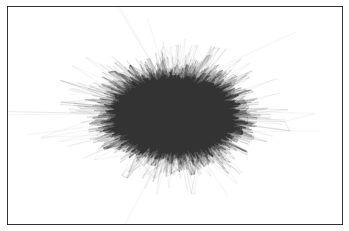

In [40]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0)
nx.draw_networkx_edges(G, pos, edge_color="#333333", alpha=0.05)
# Zoom in for a better view
plt.xlim([-0.1,0.1]); plt.ylim([-0.1, 0.1])

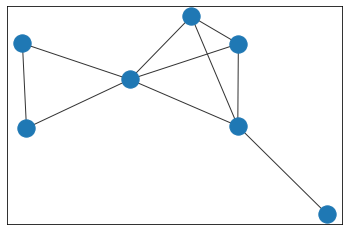

In [56]:
# Count co-occurrences for characters only
characters = [
    'creature', 'monster', 'victor', 'elizabeth',
    'william', 'henry', 'justine']

# plot the resulting graph with wider edges 
# for higher count of co-occurence
# remove = [node for node in G.nodes if node not in characters]
H = G.subgraph(characters)
# H.remove_nodes_from(remove)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos, alpha=1)
nx.draw_networkx_edges(H, pos, edge_color="#333333", alpha=1)
# Zoom in for a better view
# plt.xlim([-0.1,0.1]); plt.ylim([-0.1, 0.1])
# print(H.edges)


In [49]:
nx.draw_networkx()

In [50]:
b

In [51]:
a.plot()

AttributeError: 'PathCollection' object has no attribute 'plot'

In [52]:
plt.show()